# Preface
Advanced Mathematics for Medium version of PBL

Dataset: population of Cuba

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

dataset = pd.read_csv('Dataset/cubaData.csv')

# Viewing the dataset
dataset.head(5)
preprocessedDataset = dataset.drop(0, axis=0)
preprocessedDataset.tail(5)

,Years,Total Population,Population growth
53,2013,11412167,0.263408
54,2014,11439767,0.241555
55,2015,11461432,0.189204
56,2016,11475982,0.126867
57,2017,11484636,0.075381


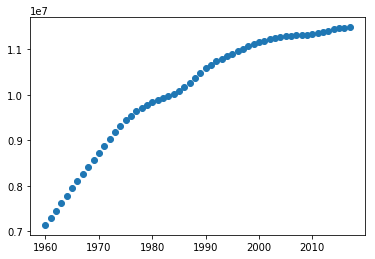

In [2]:
# Showing the scatterplot for the years
plot.scatter(dataset['Years'], dataset['Total Population'])
plot.show()

In [3]:
# aggregating values of r
carryingCapacity = 11630000
count = len(dataset['Population growth'][1:])
total = 0

# the population growth is given, fitting it to a line of y = c
for population, growth in zip(dataset['Total Population'][1:], dataset['Population growth'][1:]):
    total = total + (growth/(1-population/carryingCapacity))
    #total = total + growth
intrinsicGrowthRate = total/(count)/100
print("The intrinsic growth rate is : %f" % (intrinsicGrowthRate) )

The intrinsic growth rate is : 0.070961


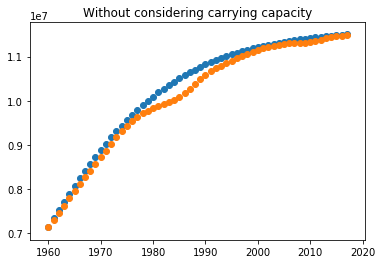

In [4]:
# plotting a scatterlot of model and actual coordinates
time = 0
initialPopulation =7141135

# create model numbers:
modelPrediction = []
for ind in dataset['Years']:
    prediction = carryingCapacity/((carryingCapacity - initialPopulation) / initialPopulation * np.exp(-intrinsicGrowthRate * time) + 1)
    modelPrediction.append(prediction)
    time = time + 1
    
plot.scatter(dataset['Years'], modelPrediction)
plot.scatter(dataset['Years'], dataset['Total Population'])
plot.title("Without considering carrying capacity")
plot.show()

7141135
The year at which popualtion reaches 94.198200 percent (10955250.713548) of carrying capacity is: 1992
The year at which popualtion reaches 94.586017 percent (11000353.795157) of carrying capacity is: 1993
The year at which popualtion reaches 94.949400 percent (11042615.275336) of carrying capacity is: 1994
The year at which popualtion reaches 95.289696 percent (11082191.653794) of carrying capacity is: 1995
The year at which popualtion reaches 95.608201 percent (11119233.767611) of carrying capacity is: 1996
The year at which popualtion reaches 95.906161 percent (11153886.580934) of carrying capacity is: 1997


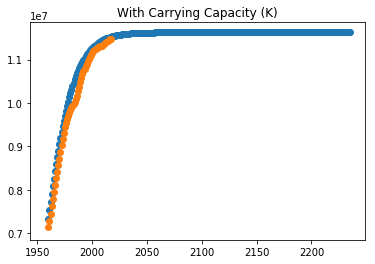

In [5]:
mediumModel =[]
previousData = dataset.iloc[0,1]
yearIndex = []
initialYear = 1960
time = 0
print(previousData)

while (previousData < carryingCapacity*0.999999999):
    yearIndex.append(initialYear + time)
    newData = previousData + intrinsicGrowthRate * previousData * (1-previousData/carryingCapacity)
    mediumModel.append(newData)
    previousData = newData
    time = time + 1
    # print(newData, initialYear + time)
    if (newData <= (carryingCapacity*0.96) and newData>=(carryingCapacity*0.94)):
        currentYear = initialYear + time
        print("The year at which popualtion reaches %f percent (%f) of carrying capacity is: %d" % (newData/carryingCapacity *100, newData, currentYear))
plot.scatter(yearIndex,mediumModel)
plot.scatter(dataset['Years'], dataset['Total Population'])
plot.title("With Carrying Capacity (K)")
plot.show()

In [6]:
# calculating time needed for 95% of carrying capacity
prediction = -1/intrinsicGrowthRate * np.log((1/0.95-1)/((carryingCapacity - initialPopulation)/initialPopulation))
print("It will be %f when the population reaches 95 percent of carrying capacity of Cuba." % (prediction + initialYear))

It will be 1994.951013 when the population reaches 95 percent of carrying capacity of Cuba.
